In [1]:
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#load digits using function provided in specs
digits = load_digits()

Text(0.5,1,'Label: 0\n')

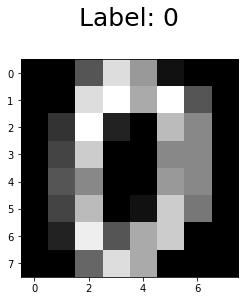

In [5]:
plt.imshow(np.reshape(digits.data[0], (8, 8)), cmap='gray')
plt.title('Label: %i\n' % digits.target[0], fontsize=25)

Text(0.5,1,'Label: 1\n')

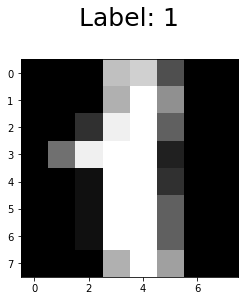

In [6]:
plt.imshow(np.reshape(digits.data[1], (8, 8)), cmap='gray')
plt.title('Label: 1\n' % digits.target[0], fontsize=25)

Text(0.5,1,'Label: 2\n')

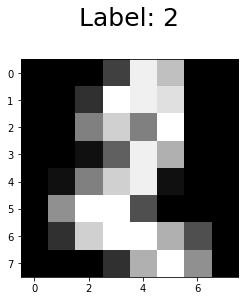

In [7]:
plt.imshow(np.reshape(digits.data[2], (8, 8)), cmap='gray')
plt.title('Label: 2\n' % digits.target[0], fontsize=25)

Text(0.5,1,'Label: 3\n')

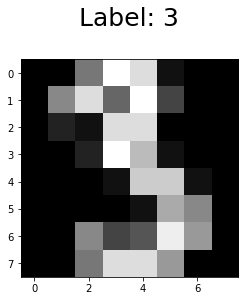

In [8]:
plt.imshow(np.reshape(digits.data[3], (8, 8)), cmap='gray')
plt.title('Label: 3\n' % digits.target[0], fontsize=25)

In [4]:
#Split the images using sklearn’s train_test_split()
#with a test size anywhere
#between 20% and 30% (inclusive) 
#Quick utility that wraps input validation and
#``next(ShuffleSplit().split(X, y))`` and application to input data
#into a single call for splitting (and optionally subsampling) data in a
#oneliner.
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=6)

In [18]:
x_train[0].shape

(64,)

In [11]:
len(x_test)

450

In [12]:
len(y_train)

1347

In [13]:
len(y_test)

450

In [14]:
def Models(x_train,x_test,y_train,y_test):
    #models 1,2,3 are defined wrt to classifiers mentioned in the specification
    model_1 = KNeighborsClassifier(n_neighbors=5)
    model_2 = SGDClassifier()
    model_3 = DecisionTreeClassifier(criterion="entropy")
    model_1.fit(x_train,y_train)
    
    #Calculating Test Size using no of testing data and training data available
    test_size=x_test.shape[0]/(x_train.shape[0] + x_test.shape[0])
    print(f'Test Size : {test_size:0.2f}.\n')
    
    ##################### KNN CLASSIFIER   ###############################
    
    knn_y_predict=model_1.predict(x_test)
    # accuracy score - KNN
    knn_accuracy_score=metrics.accuracy_score(y_test, knn_y_predict)
    # recall score - KNN
    knn_recall_score=metrics.recall_score(y_test, knn_y_predict, average='macro')
    print(f'KNN Accuracy:{knn_accuracy_score:0.3f}  KNN Recall: {knn_recall_score:0.3f}.\n')
    
    ###################### SGD CLASSIFIER  ##############################
    
    model_2.fit(x_train,y_train)
    sgd_y_predict=model_2.predict(x_test)
    # accuracy score - SGD
    sgd_accuracy_score=metrics.accuracy_score(y_test, sgd_y_predict)
    # recall score
    sgd_recall_score=metrics.recall_score(y_test, sgd_y_predict, average='macro')
    print(f'SGD Accuracy:{sgd_accuracy_score:0.3f}  SGD Recall: {sgd_recall_score:0.3f}.\n')
    
    ##########################    DECISION TREE  ##########################
    
    model_3.fit(x_train,y_train)
    DT_y_predict=model_3.predict(x_test)
    # accuracy score - DT
    DT_accuracy_score=metrics.accuracy_score(y_test, DT_y_predict)
    # recall score
    DT_recall_score=metrics.recall_score(y_test, DT_y_predict, average='macro')
    print(f'Decision Tree Accuracy:{DT_accuracy_score:0.3f}  Decision Tree Recall: {DT_recall_score:0.3f}.\n')
    
    
    # confusion matrix for KNN - best performing
    confusion_matrix=metrics.confusion_matrix(y_test, knn_y_predict)
    print(confusion_matrix)

In [15]:
print('COM9517 Week 5 Lab - z5222191\n')
Models(x_train,x_test,y_train,y_test)

COM9517 Week 5 Lab - z5222191

Test Size : 0.25.

KNN Accuracy:0.989  KNN Recall: 0.986.

SGD Accuracy:0.942  SGD Recall: 0.938.

Decision Tree Accuracy:0.844  Decision Tree Recall: 0.841.

[[52  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 51  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0  0  0]
 [ 0  0  0  0 51  0  0  0  0  0]
 [ 0  0  0  0  0 51  0  0  0  0]
 [ 0  1  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 44  0  0]
 [ 0  0  0  0  0  0  0  0 39  0]
 [ 0  1  0  2  0  1  0  0  0 31]]
